In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
imdb = keras.datasets.imdb

In [0]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [5]:
print(len(train_data))
print(train_label)
print(len(test_data))

25000
[1 0 0 ... 0 1 0]
25000


In [6]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [7]:
print(len(train_data[0]))
print(len(train_data[1]))

218
189


In [0]:
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [9]:
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [0]:
reverse_word_index = {value : key for key, value in word_index.items()}

In [11]:
reverse_word_index

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [12]:
reverse_word_index[0]

'<PAD>'

In [0]:
def decodeword(text):
  
  for i in range(len(text)):
    text[i] = " ".join([reverse_word_index[j] for j in text[i]])
   
  return text
  

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value = word_index["<PAD>"], padding = "post", maxlen= 256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding= "post", maxlen= 256)

In [15]:
print(len(train_data))
print(train_label)
print(len(test_data))

25000
[1 0 0 ... 0 1 0]
25000


In [16]:
print(len(train_data[0]))
print(len(train_data[1]))

256
256


In [22]:
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size , 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation= tf.nn.relu))
model.add(keras.layers.Dense(16, activation= tf.nn.relu))
model.add(keras.layers.Dense(1, activation= tf.nn.sigmoid))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,561
Trainable params: 160,561
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam", loss= "binary_crossentropy", metrics= ['acc'])

In [0]:
x_val = train_data[:10000]
patrial_x_train = train_data[10000: ]

y_val = train_label[:10000]
patrial_y_train = train_label[10000: ]

In [26]:
history = model.fit(patrial_x_train, patrial_y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 1s 84us/sample - loss: 0.6914 - acc: 0.5857 - val_loss: 0.6884 - val_acc: 0.6196
Epoch 2/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6828 - acc: 0.6475 - val_loss: 0.6752 - val_acc: 0.7057
Epoch 3/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.6599 - acc: 0.7005 - val_loss: 0.6427 - val_acc: 0.7098
Epoch 4/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6138 - acc: 0.7604 - val_loss: 0.5893 - val_acc: 0.7461
Epoch 5/40
15000/15000 [==============================] - 1s 53us/sample - loss: 0.5481 - acc: 0.8121 - val_loss: 0.5244 - val_acc: 0.8016
Epoch 6/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.4765 - acc: 0.8505 - val_loss: 0.4617 - val_acc: 0.8506
Epoch 7/40
15000/15000 [==============================] - 1s 52us/sa

In [27]:
results = model.evaluate(test_data, test_label)
print(results)

25000/25000 [==============================] - 1s 40us/sample - loss: 0.5491 - acc: 0.8583
[0.5491298391389847, 0.85828]


In [28]:
# create graph of accuracy
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

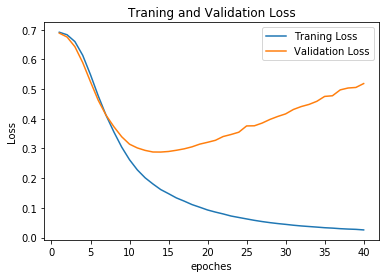

In [30]:
import matplotlib.pyplot as plt

acc = history_dict["acc"]
val_loss = history_dict["val_loss"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, label = "Traning Loss")

plt.plot(epochs, val_loss, label = "Validation Loss")
plt.title("Traning and Validation Loss")
plt.xlabel("epoches")
plt.ylabel("Loss")
plt.legend()
plt.show()

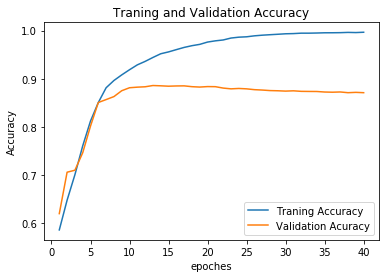

In [31]:
plt.plot(epochs, acc, label = "Traning Accuracy")
plt.plot(epochs, val_acc, label = "Validation Acuracy")
plt.title("Traning and Validation Accuracy")
plt.xlabel("epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()